In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from analyze.get_score_df import get_each_epoch_result_df
from analyze.get_structure_master import get_structure_master_df
sns.set(font_scale = 1.3)
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

# path2target ='/home/y1u0d2/result/n2p2/SiO2/02/run5_feature_selected_each_bond'
path2target = '/home/y1u0d2/result/n2p2/Si/101/03'
epoch = 69

In [26]:
f_test_df, f_train_df, e_test_df, e_train_df = get_each_epoch_result_df(path2target, epoch=epoch)

In [27]:
f_test_df

,index_s,index_a,Fref,Fnnp,Fref_original,Fnnp_original
0,207,0,-0.202272,-0.201239,-1.784477,-1.775363
1,207,0,0.346343,0.313379,3.055488,2.764677
2,207,0,-0.425077,-0.443259,-3.750089,-3.910498
3,207,1,-1.645203,-1.676660,-14.514216,-14.791734
4,207,1,-0.556234,-0.571706,-4.907173,-5.043670
...,...,...,...,...,...,...
831541,35093,1,-2.185997,-2.155854,-19.285182,-19.019259
831542,35093,1,-0.002711,-0.004606,-0.023914,-0.040636
831543,35093,2,-0.302795,-0.296770,-2.671302,-2.618146
831544,35093,2,2.176647,2.144835,19.202695,18.922043


In [28]:
structure_master_df = get_structure_master_df(path2target)

f_test_df = pd.merge(f_test_df, structure_master_df, how='inner',left_on='index_s' ,right_on='index')
f_train_df = pd.merge(f_train_df, structure_master_df, how='inner', left_on='index_s' ,right_on='index')
e_test_df = pd.merge(e_test_df, structure_master_df, how='inner', on='index')
e_train_df = pd.merge(e_train_df, structure_master_df, how='inner', on='index')

In [29]:
def calc_mape(obs_col_name: str, pred_col_name:str, df: pd.DataFrame):
    # add small value to avoid zero division
    df["obs_col_name"] = df[obs_col_name] + 1e-10
    df["pred_col_name"] = df[pred_col_name] + 1e-10
    df["mape"] = np.abs((df["obs_col_name"] - df["pred_col_name"]) / df["obs_col_name"]) * 100
    return df["mape"].mean()

print(f"MAPE for energy train: {calc_mape('Eref', 'Ennp', e_train_df):.2f}%")
print(f"MAPE for energy test: {calc_mape('Eref', 'Ennp', e_test_df):.2f}%")
print(f"MAPE for force train: {calc_mape('Fref', 'Fnnp', f_train_df):.2f}%")
print(f"MAPE for force test: {calc_mape('Fref', 'Fnnp', f_test_df):.2f}%")

MAPE for energy train: 4.67%
MAPE for energy test: 4.42%
MAPE for force train: 219.91%
MAPE for force test: 355.10%


In [23]:
# add small value in order to calculate MAPE
f_test_df["Fref"] = f_test_df["Fref"] + 1e-10
f_test_df["Fnnp"] = f_test_df["Fnnp"] + 1e-10
# calc MAPE
f_test_df["MAPE"] = np.abs((f_test_df["Fnnp"] - f_test_df["Fref"]) / f_test_df["Fref"]) * 100

In [24]:
f_test_df["MAPE"].mean()

868.2149935372848

In [ ]:
def plot_y_x(min, max, ax):
    """
    plot y=x
    """
    x = np.linspace(min*0.9, max*1.1, 100)
    y = x
    ax.plot(x, y, color='red', alpha=0.5)
    # sns.lineplot(x=x, y=y, ax=ax, palette='deep')

def plot_force_obs_pred(df, ax, title):
    """_summary_

    Args:
        df (_type_): _description_
        ax (_type_, optional): _description_. Defaults to ax.
    """
    max_lim = max(df['Fref_original'].max(), df['Fnnp_original'].max())
    min_lim = min(df['Fref_original'].min(), df['Fnnp_original'].min())
    lim = (min_lim*0.9, max_lim*1.1)
    ax.set(xlim=lim, ylim=lim)
    ax.set_title(title)
    sns.scatterplot(data=df, x='Fref_original', y='Fnnp_original', ax=ax, hue='mpid')
    # sns.scatterplot(data=df, x='Fref_original', y='Fnnp_original', ax=ax, alpha=0.3)
    # use latex for label
    ax.set_xlabel(r'$F_{obs} [eV/A]$')
    ax.set_ylabel(r'$F_{pred} [eV/A]$')
    plot_y_x(min_lim, max_lim, ax)
    
def plot_energy_obs_pred(df, ax, title):
    # max_lim = max(df['Eref_original'].max(), df['Ennp_original'].max())
    # min_lim = min(df['Eref_original'].min(), df['Ennp_original'].min())
    max_lim = max(df['Eref'].max(), df['Ennp'].max())
    min_lim = min(df['Eref'].min(), df['Ennp'].min())
    print(min_lim, max_lim)
    lim = (min_lim*0.9, max_lim*1.1)
    ax.set(xlim=lim, ylim=lim)
    ax.set_title(title)
    # sns.scatterplot(data=df, x='Eref', y='Ennp', ax=ax, alpha=0.5)
    sns.scatterplot(data=df, x='Eref', y='Ennp', ax=ax, alpha=0.5, hue='mpid')
    ax.set_xlabel(r'$E_{obs} [eV]$')
    ax.set_ylabel(r'$E_{pred} [eV]$')
    plot_y_x(min_lim, max_lim, ax)

-1.02026696 13.4871298
-1.02052839 19.4061622


/tmp/ipykernel_563850/1433388640.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_563850/1433388640.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


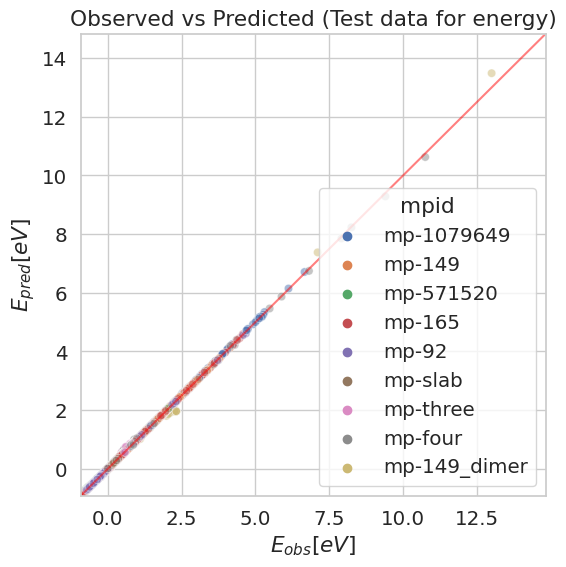

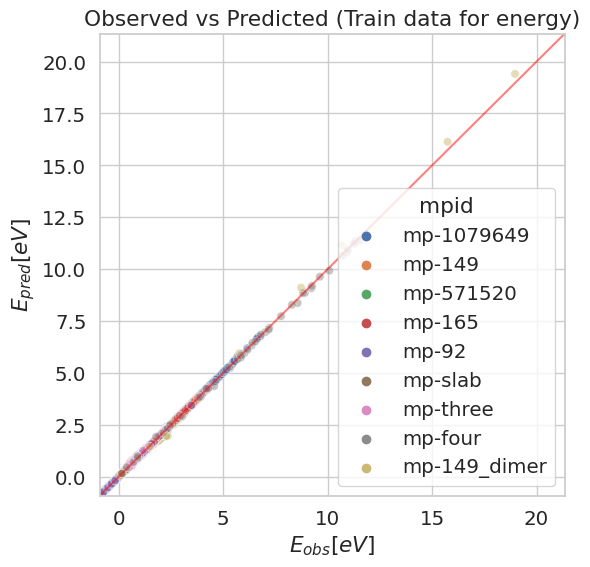

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

plot_energy_obs_pred(e_test_df, ax=ax, title='Observed vs Predicted (Test data for energy)')
fig.show()

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plot_energy_obs_pred(e_train_df, ax=ax, title='Observed vs Predicted (Train data for energy)')
fig.show()

/home/y1u0d2/anaconda3/envs/research/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


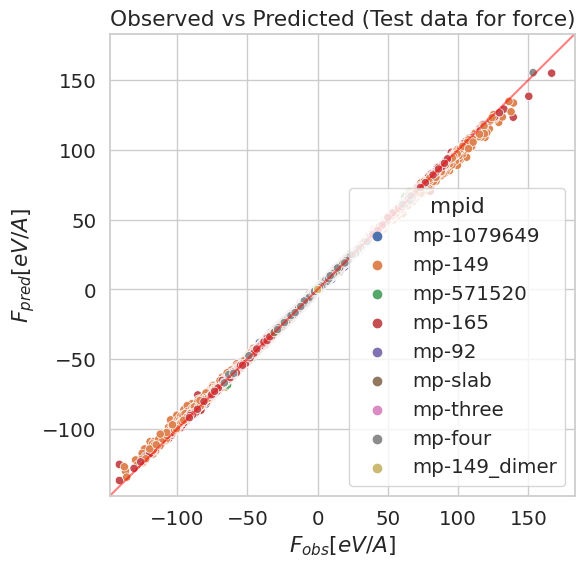

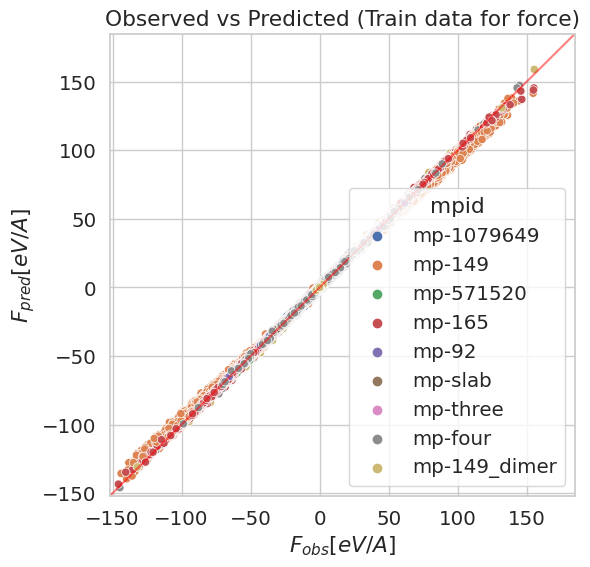

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

plot_force_obs_pred(f_test_df, ax=ax, title='Observed vs Predicted (Test data for force)')

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plot_force_obs_pred(f_train_df, ax=ax, title='Observed vs Predicted (Train data for force)')